# Coursework 2

### PLAGIARISM/COLLUSION DECLARATION

 

Coursework submitted for assessment must be the original work of you and your group. Assignments are subjected to regular checks for plagiarism and/or collusion. Plagiarism is the presentation of another person’s thoughts or words (those outside your group) as if they were your own. Collusion involves obtaining help from someone outside your group to complete your work. In preparing your coursework, you should not seek help, or copy from any other person or source, including the

Internet, without proper and explicit acknowledgement.

 

There is a procedure in place for you to declare individual contributions within your group for courswork. You must declare the contributions fairly and accurately.

 

You must not disclose your solutions or insights related to coursework with anyone else, including future students or the Internet.

 

By acknowledging the the statements above, you are declaring that both this and all subsequent pieces of coursework are, and will remain, the original work of you and your group.

 

* Submissions will not be accepted without the aforementioned declaration.

 

* Members of a group are deemed to have collective responsibility for the integrity for work submitted and are liable for any penalty imposed, proportionate to their contributions.

In [153]:
using JLD2,FileIO
using LinearAlgebra
using Wavelets
using FFTW
using LinearMaps
using IterativeSolvers

In [3]:
# Run this code before you start doing the coursework

Base.@kwdef mutable struct CourseWork_1
    
    CID::Int
    Plagiarism_declare::Union{Missing,Bool}
    Demo_willing::Union{Missing,Bool}
    
    # 6.1 Proximal Operator
    
    Q6_1_a_data_A::Matrix
    Q6_1_a_data_b::Vector
    Q6_1_a_data_z::Vector
    Q6_1_a_data_gamma::Float64
    
    Q6_1_a_ans_x::Union{Missing,Vector}
    
    Q6_1_b_data_z::Vector
    Q6_1_b_data_a::Float64
    Q6_1_b_data_b::Float64
    Q6_1_b_data_gamma::Float64
    
    Q6_1_b_ans_x::Union{Missing,Vector}
    
    Q6_1_c_data_z::Vector
    Q6_1_c_data_k::Int
    Q6_1_c_data_gamma::Float64
    
    Q6_1_c_ans_x::Union{Missing,Vector}
    
    Q6_1_d_data_z::Vector
    Q6_1_d_data_gamma::Float64
    
    Q6_1_d_ans_x::Union{Missing,Vector}
    
    Q6_1_e_data_Z::Matrix
    Q6_1_e_data_r::Int
    Q6_1_e_data_gamma::Float64
    
    Q6_1_e_ans_X::Union{Missing,Matrix}
    
    Q6_1_f_data_Z::Matrix
    Q6_1_f_data_gamma::Float64
    
    Q6_1_f_ans_X::Union{Missing,Matrix}
    
    Q6_1_g_data_Z::Matrix
    Q6_1_g_data_gamma::Float64
    
    Q6_1_g_ans_X::Union{Missing,Matrix}
    
    Q6_1_h_data_z::Vector
    Q6_1_h_data_gamma::Float64
    
    Q6_1_h_ans_x::Union{Missing,Vector}
    
    # 6.2 Proximal operators related to ℓ1-norm
    
    Q6_2_a_data_z::Vector
    Q6_2_a_data_gamma::Float64
    Q6_2_a_data_lambda::Float64
    
    Q6_2_a_ans_x::Union{Missing,Vector}
    
    Q6_2_b_data_z::Vector
    Q6_2_b_data_a::Vector
    Q6_2_b_data_gamma::Float64
    Q6_2_b_data_lambda::Float64
    
    Q6_2_b_ans_x::Union{Missing,Vector}
    
    Q6_2_c_data_z::Vector
    Q6_2_c_data_U::Matrix
    Q6_2_c_data_gamma::Float64
    Q6_2_c_data_lambda::Float64
    
    Q6_2_c_ans_x::Union{Missing,Vector}
    
    Q6_2_d_data_z::Vector
    Q6_2_d_data_U::Matrix
    Q6_2_d_data_gamma::Float64
    Q6_2_d_data_lambda::Float64
    
    Q6_2_d_ans_x::Union{Missing,Vector}
    
    # 7.1 Greedy Algorithms
    
    Q7_1_1_data_y::Vector
    Q7_1_1_data_A::Matrix
    Q7_1_1_data_S::Int
    
    Q7_1_1_ans_x::Union{Missing,Vector}
    
    Q7_1_2_data_y::Vector
    Q7_1_2_data_A::Matrix
    Q7_1_2_data_S::Int
    
    Q7_1_2_ans_x::Union{Missing,Vector}
    
    Q7_1_3_data_y::Vector
    Q7_1_3_data_A::Matrix
    Q7_1_3_data_S::Int
    
    Q7_1_3_ans_x::Union{Missing,Vector}
    
    # 7.2 Proximal Gradient Method
    
    Q7_2_1_data_z::Vector
    Q7_2_1_data_xini::Vector
    Q7_2_1_data_A::Matrix
    Q7_2_1_data_lambda::Float64
    Q7_2_1_data_gamma::Float64
    
    Q7_2_1_ans_xhat::Union{Missing,Vector}
    Q7_2_1_ans_subgradient::Union{Missing,Vector}
    
    Q7_2_2_data_z::Vector
    Q7_2_2_data_A::Matrix
    Q7_2_2_data_lambda::Float64
    
    Q7_2_2_ans_objfun::Union{Missing,Vector}
    
    # 7.3 MRI CS Recovery: Wavelet
    
    Q7_3_1_data_X0::Matrix
    Q7_3_1_data_Omega::Matrix
    Q7_3_1_data_y::Vector
    
    Q7_3_1_ans_gradient::Union{Missing,Matrix}
    
    Q7_3_2_data_lambda::Float64
    
    Q7_3_2_ans_X1::Union{Missing,Matrix}
    
    Q7_3_3_ans_X::Union{Missing,Matrix}
    
    # 7.4 MRI CS Recovery: DCT
    
    Q7_4_1_data_X0::Matrix
    Q7_4_1_data_Omega::Matrix
    Q7_4_1_data_y::Vector
    Q7_4_1_data_lambda::Float64
    
    Q7_4_1_ans_X1::Union{Missing,Matrix}
    
    Q7_4_2_ans_X::Union{Missing,Matrix}
    
    # 7.5 MRI CS Recovery: Wavelet and DCT
    
    Q7_5_1_data_Z1::Matrix
    Q7_5_1_data_Z2::Matrix
    Q7_5_1_data_Omega::Matrix
    Q7_5_1_data_y::Vector
    Q7_5_1_data_lambda::Float64
    Q7_5_1_data_alpha::Float64
    
    Q7_5_1_ans_X1::Union{Missing,Matrix}
    
    Q7_5_2_ans_Z1::Union{Missing,Matrix}
    Q7_5_2_ans_Z2::Union{Missing,Matrix}
    
    Q7_5_3_ans_X::Union{Missing,Matrix}
    
end

CourseWork_1

In [4]:
# Download and upload data from JLD file, refer to https://juliaio.github.io/JLD2.jl/dev/
# Example
A = JLD2.load("Laurie Johnston1705019StudentFile.jld2");
A = A[ "CourseWork_1" ];
A.Demo_willing = true;


In [4]:
jldopen("Laurie Johnston1705019StudentFile.jld2", "w") do file
    write(file, "CourseWork_1", A)
  end

## 6.1. Proximal Operator


### 1. (a)

In [5]:
# save your answers in Q6_1_a_ans_x
function Q6_11a() 

### 1. (b)

In [6]:
# save your answers in Q6_1_b_ans_x


### 1. (c)

In [7]:
# save your answers in Q6_1_c_ans_x

### 1. (d)

### 1. (e)

### 1. (f)

### 1. (g)

### 1. (h)

### 2. (a)

### 2. (b)

### 2. (c)

### 2. (d)

In [52]:
z = A.Q6_2_d_data_z
U = A.Q6_2_d_data_U
gamma = A.Q6_2_d_data_gamma
lambda = A.Q6_2_d_data_lambda

# using the solution from this derivation online: https://math.stackexchange.com/questions/1961888/the-proximal-operator-of-the-l-1-norm-function 
x = U' * ((sign.(U*z) .* max.((abs.(U*z) .- (lambda * gamma)), 0.0)) ) 

# x = max.((sign.(x).*(U*z).-(gamma*lambda)),0.0)

# print(sign.(x).*(U'*z).-gamma*lambda)


# print error and have a look
error = (lambda * norm((U*x), 1)) + ((1/(2*gamma)) * (norm((x-z), 2)^2)) 
# println(error)

# A.Q6_2_d_ans_x = x


20.59085435909057

## 7.1. Greedy Algorithms

### 1

### 2

### 3

## 7.2. Proximal Gradient Method

### 1

### 2

### 3

## 7.3. MRI CS Recovery: Wavelet

### 1

In [5]:
# function MRI(x,omega)
#     m,n=size(x)
#     O1= fft(x)
#     O2= fftshift(O1)
#     O3= zeros(ComplexF64,m,n)
#     for i in 1:m
#         for j in 1:n
#             if omega[i,j]==1
#                 O3[i,j]=O2[i,j]
#             end
#         end
#     end
#     O3=vec(O3)
#     O3 = filter(x -> x != 0, vec(O3))
#     return O1,O2,O3
# end

# function IvMRI(y,omega)
#     m,n=size(omega)

#     vec_omega = vec(omega)
#     O1 = complex(Array{Float64}(undef, length(vec_omega)))
#     j = 1
#     for i in 1:length(vec_omega)
#         if vec_omega[i] != 0
#             O1[i] = round(y[j]; digits = 8)
#             j+=1
#         end
#     end
#     O1=reshape(O1, m,n)
#     O2=ifftshift(O1)
#     O3=ifft(O2)
#     return O1,O2,O3
# end


# Ay = 
# find_Ay(
#     A.Q7_3_1_data_Omega,
#     A.Q7_3_1_data_y
# )

# AAX = 
# find_AAX(
#     A.Q7_3_1_data_Omega,
#     A.Q7_3_1_data_X0
# )




In [71]:
function adj_A(Omega, y)
    vec_omega = vec(Omega)
    O1 = complex(Array{Float64}(undef, length(vec_omega)))
    j = 1
    for i in 1:length(vec_omega)
        if vec_omega[i] != 0
            O1[i] = y[j]
            j+=1
        end
    end
    O1 = reshape(O1,512,512)
    O2=ifftshift(O1)
    O3=ifft(O2)
    return O3
end

function find_AAX(X,Omega)
    O1 = fft(X)
    O2 = fftshift(O1)
    O4O3 = Omega .* O2
    O5 = ifftshift(O4O3)
    O6 = ifft(O5)
    return O6
end


function find_grad(X, Omega, y)
    return - adj_A(Omega, y) + find_AAX(X, Omega)
end

A.Q7_3_1_ans_gradient = 
find_grad(
    A.Q7_3_1_data_X0,
    A.Q7_3_1_data_Omega,
    A.Q7_3_1_data_y
);


### 2

In [73]:
### NOTE: the wavelet operator is unitary, we can use 6.2d

# Get variables first
X0 = A.Q7_3_1_data_X0
Omega = A.Q7_3_1_data_Omega
y = A.Q7_3_1_data_y
lambda = A.Q7_3_2_data_lambda

# get gamma = 1/2n
m,n = size(A.Q7_3_1_data_X0)
gamma = 1/(2*n)

# get input to proximal operator
z = X0 - gamma * find_grad(X0,Omega,y)

# now we apply proximal operator
function prox_dwt(z,lambda, gamma)      #lambda use in non-differenciable function
    # here we use the solution obtained from 6.2d
    Uz = dwt(z, wavelet(WT.db4))
    a = abs.(Uz).- (lambda * gamma)
    b = max.(a,0.0)
    c = sign.(Uz).*b
    output = idwt(c,  wavelet(WT.db4))   
    return output
end

#one step size of solution:

prox_dwt(
    z, lambda, gamma
);

### 3

In [83]:
function f_(X,Omega,y)
    O1 = fft(X)
    O2 = fftshift(O1)
    O2_5 = Omega .* O2
    O3 = filter(x -> x != 0, vec(O2_5))
    v = y-O3
    return 0.5*norm(v)^2
end

function f_hat(z,X,Omega,y,gamma)
    a = f_(X,Omega,y)          #Omega, y are given constants
    b = conj(vec(grad))' * vec(z-X)
    c = (1/(2*gamma))* norm(vec(z-X))^2
    return real(a + b + c)
end

# input = X - gamma * find_grad(X,Omega,y)
# z = prox_dwt(input,lambda, gamma)
# f_1_hat(z,X,Omega,y,gamma)

f_hat (generic function with 2 methods)

In [84]:
# Get variables
X0 = A.Q7_3_1_data_X0
Omega = A.Q7_3_1_data_Omega
y = A.Q7_3_1_data_y
lambda = A.Q7_3_2_data_lambda

#set gamma manually
gamma_init = 0.2

# Choose yeta between 0, 1
yeta = 0.5

### Apply Proximal gradient method with backtracking
X = X0 # Initialize X
for i in 1:40  # main loop
    gamma = gamma_init
    grad = find_grad(X,Omega,y)
    
    for j in 1:20   
        step = X - gamma * grad
        z = prox_dwt(step,lambda, gamma)
        if f_(z,Omega,y) < f_hat(z,X,Omega,y,gamma,grad)
            break
        end 
        gamma *= yeta
    end # end for

    # Print loss to have a look
    if i%5 == 0
        loss = lambda*norm(dwt(X, wavelet(WT.db4)),1)+f_1(X,Omega,y)
        print("Iteration ",i,":",loss)
    end
    X = z
end # end for

X_final = X;
A.Q7_3_3_ans_X = X;


Iteration 5:6.301132871199533e9Iteration 10:8.198187335693316e8

Iteration 15:2.4910061850651366e8Iteration 20:

1.488658338578584e8Iteration 25:9.598244687583019e7

Iteration 30:

7.740443884228145e7Iteration 35:7.687522669584054e7

Iteration 40:

7.687522671110618e7

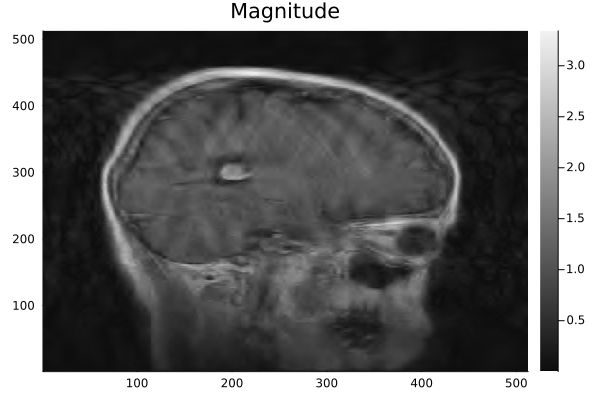

In [78]:

using Plots
magnitude = abs.(X_final)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)


## 7.4. MRI CS Recovery: DCT

### 1

In [63]:
### Run this before everything in 7.4
# Get variables first
X0 = A.Q7_4_1_data_X0;
Omega = A.Q7_4_1_data_Omega;
y = A.Q7_4_1_data_y;
lambda = A.Q7_4_1_data_lambda;

In [64]:
#We can reuse find_grad() from 7.3
# get gamma = 1/2n
m,n = size(X0)
gamma = 1/(2*n)

# get input to proximal operator
z = X0 - gamma * find_grad(X0,Omega,y);

# now we make the proximal operator
function prox_dct(z,lambda, gamma)      #lambda use in non-differenciable function
    # here we use the solution obtained from 6.2d
    Uz = dct(z)
    a = abs.(Uz).- (lambda * gamma)
    b = max.(a,0.0)
    c = sign.(Uz).*b
    output = idct(c)   
    return output
end

#one step size of solution:

prox_dct(
    z, lambda, gamma
);



512×512 Matrix{ComplexF64}:
 0.0508264-0.000738145im  …    -0.796523+0.000103481im
   2.35442-0.000211562im         2.68843+0.000280335im
  0.640446-0.000150148im         1.64485+0.000200628im
  0.984717-0.000210544im        0.495718-0.000233005im
  0.227232-0.000243229im       -0.793196-0.000106716im
  -0.47876-0.000383881im  …     -0.50873+2.40946e-5im
   1.90002-0.000321347im       -0.227719-6.42617e-5im
 0.0645349-0.000198162im        0.522795+3.45007e-6im
 -0.791666+0.000208886im        -1.24486+1.40194e-5im
  0.612496+0.000333834im        -2.39371-0.000134997im
          ⋮               ⋱  
   1.43644-0.000647065im          1.6393-0.000378046im
   1.25372-0.000482002im       -0.995486-7.59791e-5im
  0.395995-0.000161145im  …    -0.503198-0.000440666im
  -1.62365-0.00065221im      -0.00307619-0.000384191im
 -0.378864-0.000191654im        0.200948+0.000287562im
 -0.205652-0.000398344im       -0.477427-0.000139095im
 -0.286045+0.000100948im       -0.350804+0.000173013im
 -0.562123+0

### 2

In [85]:
#We can reuse find_grad() , f_() and f_hat() but have to make new function for prox
#set gamma manually
gamma_init = 0.2

# Choose yeta between 0, 1
yeta = 0.5

### Apply Proximal gradient method with backtracking
X = X0 # Initialize X
for i in 1:100  # main loop
    gamma = gamma_init
    grad = find_grad(X,Omega,y)
    for j in 1:20   
        step = X - gamma * grad
        z = prox_dct(step,lambda, gamma)
        if f_1(z,Omega,y) < f_hat(z,X,Omega,y,gamma,grad)
            break
        end  
        gamma *= yeta   #shrink
    end # end for

    # Print loss to have a look
    if i%5 == 0
        loss = lambda*norm(dwt(X, wavelet(WT.db4)),1)+f_1(X,Omega,y)
        print("Iteration ",i,":",loss)
    end
    X = z
end # end for

X_final = X
A.Q7_4_2_ans_X = X;
X_final

Iteration 5:6.144505778591324e9

Iteration 10:

7.130601067351701e8Iteration 15:

1.8861921314534354e8Iteration 20:1.1634214643703151e8

Iteration 25:

9.792964943241833e7Iteration 30:

9.199418988807504e7Iteration 35:9.058174945397379e7

Iteration 40:9.037960312425455e7

Iteration 45:9.036900878710197e7

Iteration 50

:9.03458720104712e7Iteration 55:9.030970946643023e7

Iteration 60:

9.024095420396107e7Iteration 65:

9.014020149691084e7Iteration 70:

9.004916368207912e7Iteration 75:

8.99628401608081e7Iteration 80:8.987597655900289e7

Iteration 85:8.980407041275935e7

Iteration 90:8.974211005506638e7

Iteration 95:8.968176533624199e7

Iteration 100:8.963371307033947e7

512×512 Matrix{ComplexF64}:
 -0.0636662-0.101846im     …    0.0176076-0.022593im
  -0.051475-0.0952857im         0.0067702-0.019192im
 -0.0401276-0.0823261im       -0.00132379-0.0154648im
 -0.0419104-0.0640964im        0.00345805-0.0123932im
  -0.054435-0.0427146im          0.011859-0.00895992im
 -0.0592207-0.0205216im    …   0.00979086-0.00790138im
 -0.0415627+0.000336475im      0.00182808-0.0155134im
  -0.017511+0.0181882im        -0.0042817-0.0329844im
 -0.0138475+0.0322888im        -0.0099444-0.0518451im
 -0.0237504+0.0424362im       -0.00791678-0.0613185im
           ⋮               ⋱  
 3.69393e-5-0.0253537im         0.0460356-0.00785502im
 -0.0223962-0.0128523im         0.0198108+0.000390982im
 -0.0503394+0.00318598im   …  -0.00462548+0.00818888im
 -0.0615191+0.0203025im         -0.016668+0.0150551im
   -0.06253+0.035646im         -0.0228466+0.0190024im
 -0.0696265+0.0473166im        -0.0311097+0.0169504im
 -0.0774595+0.0556328im        -0.0463634+0.00783683im
  -0.074381+0.0618

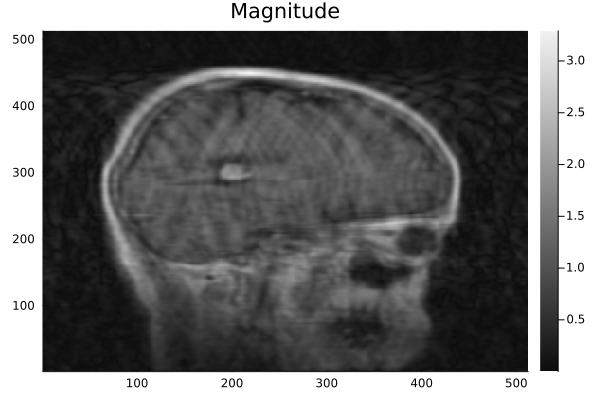

In [86]:

using Plots
magnitude = abs.(X_final)

# Rotate the data for plotting
magnitude_rotated = magnitude[end:-1:1, end:-1:1]

# Plot the magnitude
p1 = heatmap(magnitude_rotated, color=:grays, title="Magnitude")
plot(p1)


## 7.5. MRI CS Recovery: Wavelet and DCT

### 1

In [88]:
### Run before doing 7.5
Z1 = A.Q7_5_1_data_Z1
Z2 = A.Q7_5_1_data_Z2
Omega = A.Q7_5_1_data_Omega
y = A.Q7_5_1_data_y
lambda = A.Q7_5_1_data_lambda
alpha = A.Q7_5_1_data_alpha

1.0

In [150]:
### Goal: Get X1
# idwt(_,  wavelet(WT.db4))   
# dwt(_, wavelet(WT.db4))
# function find_grad_W(X,Z,alpha)    #Updates X, so Z shall be a constant
#     first_term = -2*idwt(Z,  wavelet(WT.db4))
#     second_term = 2*X       #Note that wavelet transform is unitary
#     constant = alpha/2
#     return constant*(first_term + second_term)
# end

# function find_grad_D(X,Z,alpha)
#     first_term = -2*idct(Z)
#     second_term = 2*X       #Note that DCT transform is unitary, so 2*D_adj*D*X = 2*X
#     constant = alpha/2
#     return constant*(first_term + second_term)
# end

# Formulatting question into least square problem, we get:
# (2*alpha*I + A_adj*A)*X = -alpha*(W_adj(Z1) + D_adj(Z2)) - A_adj(y)

# First make function for linear map
function Mappy(X)
    first_term = 2*alpha*X
    O1 = fft(X)
    O2 = fftshift(O1)
    O4O3 = Omega .* O2
    O5 = ifftshift(O4O3)
    second_term = real(ifft(O5))
    return first_alpha + second_term
end

function get_b(Z1_,Z2_)
    first_term = -alpha*(idwt(Z1_,  wavelet(WT.db4)) + idct(Z2_) )
    second_term = -adj_A(Omega, y)
    return first_term + second_term
end


# #Make Linear Map to solve least square problem
# A_linear_map = LinearMap(linear_map, length(b), ismutating=false)
# output = A_linear_map \ b

get_b (generic function with 1 method)

In [167]:
b_ = real(Array{Float64}(undef, 512*512))
output = Matrix{Float64}(undef,512,512)


b_ = real(vec(get_b(Z1,Z2)))

Operator = LinearMap(Mappy,512*512)


# cg(Operator,b_, maxiter=1000)







262144×262144 FunctionMap{Float64,false}(Mappy; issymmetric=false, ishermitian=false, isposdef=false)

In [ ]:
num = 512
a = rand(num ,num )
b = inv(a)
a*b

### 2

In [ ]:
# Define the linear_map function which will transform the input vector x.

function linear_map(x)
    # Reshape the input vector x to match the dimensions of Omega.
    x = reshape(x, size(Omega))
    
    # Compute the Fast Fourier Transform (FFT) of x.
    x_fft = fft(x)
    
    # Shift zero-frequency component to the center using FFTshift.
    x_shift_fft = fftshift(x_fft)
    
    # Perform element-wise multiplication with the matrix Omega.
    # This represents subsampling in the frequency domain.
    x_omega = Omega .* x_shift_fft
    
    # Convert the data back from the frequency domain to its original domain.
    # First, undo the FFTshift using ifftshift, then apply the inverse FFT and regularisation term. Alpha = 0.1
    y = real(ifft(ifftshift(x_omega))) + 0.1*x
    
    # Flatten the 2D matrix y into a 1D vector.
    return vec(y)
end

# Compute the Fourier transformation of X, shift zero-frequency to the center, 
# and then perform element-wise multiplication with Omega.
Y = Omega .* fftshift(fft(X))

# Convert the result back from the frequency domain to the spatial domain.
# First, undo the FFTshift using ifftshift, then apply the inverse FFT.
b = real(ifft(ifftshift(Omega .* Y)))

# Flatten the 2D matrix b into a 1D vector.
b = vec(b)

# Define a linear map operation. 
# This will use the linear_map function to transform data during computations.
# The size of the output is given by the length of b.
# The ismutating=false indicates that the function does not modify its input.
A_linear_map = LinearMap(linear_map, length(b), ismutating=false)

# Use the Conjugate Gradient method to solve for x_hat.
# This is an iterative method to solve linear systems.
x_hat = cg(A_linear_map, b, maxiter=1000)

# Reshape the solution vector x_hat to match the dimensions of Omega.
x_hat = reshape(x_hat, size(Omega))

# Store the result in CW1.Q5_4_1_c_ans_X_hat.
CW1.Q5_4_1_c_ans_X_hat = x_hat